In [1]:
# importing the relevant modules
import gym
import matplotlib.pyplot as plt
from IPython.display import clear_output
from time import sleep
import random
import numpy as np

In [2]:
# Setting up and initializing the environment
env = gym.make("Taxi-v3").env
env.render()

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Action Space Discrete(6)
State Space Discrete(500)


Results after 100 episodes:
Average timesteps per episode: 1.0
Average penalties per episode: 629.65


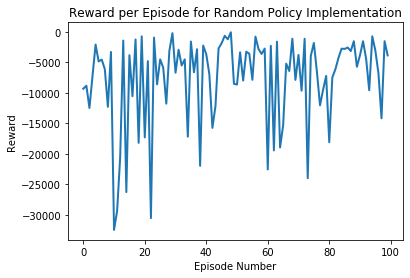

In [3]:
# Random Policy Implementation
no_epochs, no_penalties, episode_reward = 0,0,0
no_episodes = 100
episode_reward_list = []

# Iterating through 100 episodes(each episode represents a passenger)
for _ in range(no_episodes):
    state = env.reset()
    epochs, penalties, reward, = 0, 0, 0
    episode_reward = 0
    
    # bool -> True, if successfully picks and drops a passenger
    done = False
    
    while not done:
        action = env.action_space.sample()
        state, reward, done, info = env.step(action)
        episode_reward += reward
        
        # Incase of a mistake:
        if reward == -10:
            penalties+= 1
    epochs+=1
    no_penalties+=penalties
    no_epochs+=epochs
    episode_reward_list.append(episode_reward)
    episode_reward = 0

avg_time_random = no_epochs / no_episodes
print(f"Results after {no_episodes} episodes:")
print(f"Average timesteps per episode: {avg_time_random}")
print(f"Average penalties per episode: {no_penalties / no_episodes}")

# Visualizing the results
plt.plot(episode_reward_list , linewidth=2)
plt.ylabel('Reward')
plt.xlabel('Episode Number')
plt.title("Reward per Episode for Random Policy Implementation")
plt.show()

In [8]:
# Q-Learning Implementation

# 1. Q-Learning Training
%time

#initializing the q table
q_table = np.zeros([env.observation_space.n, env.action_space.n])
print(q_table)

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []
episode_reward = 0
q_reward_list = []

#train over 10,000 episodes
for i in range(1, 10001):
    state = env.reset()
    epochs, penalties, reward, = 0, 0, 0
    
    done = False
    
    #while 10,000 episodes are not complete
    while not done:
        # Exploraton or Exploitation process
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values
        episode_reward += reward
    
        # Perform an action
        next_state, reward, done, info = env.step(action) 
        
        # Getting previous Q value
        old_value = q_table[state, action]
        #obtain the maximum reward for next state
        next_max = np.max(q_table[next_state])
        #obtain new q value after action was taken
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        #update q_table with new q value
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1
    
    q_reward_list.append(episode_reward)
    episode_reward = 0

    #live update on current episode    
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

Episode: 10000
Training finished.



In [ ]:
# 2. Q-Learning Implementation after training
no_epochs , no_penalties = 0,0
no_episodes = 100
Q_episode_reward_list = []
episode_reward = 0

for _ in range(no_episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    done = False
    
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)
        episode_reward+=reward
        
        if reward == -10:
            penalties += 1
        epochs+=1
        
    no_penalties += penalties
    no_epochs += epochs
    Q_episode_reward_list.append(episode_reward)
    episode_reward = 0

avg_time_Q = no_epochs / no_episodes
print(f"Results after {no_episodes} episodes:")
print(f"Average timesteps per episode: {avg_time_Q}")
print(f"Average penalties per episode: {no_penalties / no_episodes}")

# Visualizing the results
plt.plot(Q_episode_reward_list , linewidth=2)
plt.ylabel('reward')
plt.xlabel('iteration')
plt.title("Reward per Episode for Q-Learning Implementation")
plt.show()

In [ ]:
# Calculating Percentage Performance Difference for both implementations
time_random = ((avg_time_random - avg_time_Q) / avg_time_random)*100
print("The performance difference of Random Policy and Q-Learning is "time_random)